In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [2]:
f = pd.read_csv (r'C:\Users\shahb\OneDrive\Desktop\ninety_days_aggregated_data_ca_drought.csv')
print(f)

       Unnamed: 0    fips   PRECTOT          PS      QV2M        T2M  \
0               0  6001.0  0.196000  100.487000  5.158000   7.692000   
1               0  6001.0  1.709412  100.257059  5.701765   8.592941   
2               0  6001.0  5.068333  100.105833  6.274583   9.290833   
3               0  6001.0  4.312581  100.076129  6.227097   9.242903   
4               0  6001.0  3.762632  100.067105  6.358947   9.557368   
...           ...     ...       ...         ...       ...        ...   
63563           0  6115.0  0.586000   95.797222  3.967889  16.987444   
63564           0  6115.0  1.059778   95.826000  3.981444  15.774889   
63565           0  6115.0  1.363333   95.881111  3.865667  14.584333   
63566           0  6115.0  1.706778   95.900556  3.775444  13.172000   
63567           0  6115.0  1.894186   95.929302  3.846860  11.910581   

         T2MDEW    T2MWET    T2M_MAX    T2M_MIN  ...         TS     WS10M  \
0      3.782000  3.810000  13.969000   3.687000  ...   7.3

In [3]:
s=f.drop(['Unnamed: 0','fips'], 1)
print(s)

        PRECTOT          PS      QV2M        T2M    T2MDEW    T2MWET  \
0      0.196000  100.487000  5.158000   7.692000  3.782000  3.810000   
1      1.709412  100.257059  5.701765   8.592941  5.245294  5.262941   
2      5.068333  100.105833  6.274583   9.290833  6.589167  6.601667   
3      4.312581  100.076129  6.227097   9.242903  6.543226  6.553871   
4      3.762632  100.067105  6.358947   9.557368  6.895263  6.903947   
...         ...         ...       ...        ...       ...       ...   
63563  0.586000   95.797222  3.967889  16.987444 -0.969000 -0.422778   
63564  1.059778   95.826000  3.981444  15.774889 -0.911556 -0.120444   
63565  1.363333   95.881111  3.865667  14.584333 -1.221556 -0.182556   
63566  1.706778   95.900556  3.775444  13.172000 -1.462889 -0.192333   
63567  1.894186   95.929302  3.846860  11.910581 -1.190465  0.204419   

         T2M_MAX    T2M_MIN  T2M_RANGE         TS     WS10M  WS10M_MAX  \
0      13.969000   3.687000  10.283000   7.392000  2.666000  

In [4]:
s['score'] = s['score'].round()
print(s.score)
print(s.score.value_counts())

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
63563    3.0
63564    3.0
63565    3.0
63566    3.0
63567    3.0
Name: score, Length: 63568, dtype: float64
0.0    27785
1.0    10371
2.0     9985
3.0     7722
4.0     3911
5.0     3794
Name: score, dtype: int64


In [7]:
s.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,0.196000,100.487000,5.158000,7.692000,3.782000,3.810000,13.969000,3.687000,10.283000,7.392000,2.666000,4.207000,1.488000,2.719000,4.001000,5.938000,2.173000,3.766000,1.0
1,1.709412,100.257059,5.701765,8.592941,5.245294,5.262941,14.011176,4.871765,9.138824,8.114706,2.854706,4.770588,1.411765,3.357647,4.334118,6.690000,2.225294,4.465294,1.0
2,5.068333,100.105833,6.274583,9.290833,6.589167,6.601667,14.182917,5.894167,8.288750,8.776250,2.808750,4.680000,1.409583,3.270417,4.319583,6.540833,2.277500,4.263333,0.0
3,4.312581,100.076129,6.227097,9.242903,6.543226,6.553871,14.189677,5.745484,8.443871,8.753548,2.783871,4.532903,1.407419,3.124839,4.286129,6.458065,2.277419,4.180968,0.0
4,3.762632,100.067105,6.358947,9.557368,6.895263,6.903947,14.776316,5.984211,8.791579,8.990000,2.743158,4.506579,1.361316,3.144474,4.222368,6.416842,2.210263,4.207105,0.0


In [5]:
s['score'] = s["score"].replace([2,3,4,5],1)
print(s)

        PRECTOT          PS      QV2M        T2M    T2MDEW    T2MWET  \
0      0.196000  100.487000  5.158000   7.692000  3.782000  3.810000   
1      1.709412  100.257059  5.701765   8.592941  5.245294  5.262941   
2      5.068333  100.105833  6.274583   9.290833  6.589167  6.601667   
3      4.312581  100.076129  6.227097   9.242903  6.543226  6.553871   
4      3.762632  100.067105  6.358947   9.557368  6.895263  6.903947   
...         ...         ...       ...        ...       ...       ...   
63563  0.586000   95.797222  3.967889  16.987444 -0.969000 -0.422778   
63564  1.059778   95.826000  3.981444  15.774889 -0.911556 -0.120444   
63565  1.363333   95.881111  3.865667  14.584333 -1.221556 -0.182556   
63566  1.706778   95.900556  3.775444  13.172000 -1.462889 -0.192333   
63567  1.894186   95.929302  3.846860  11.910581 -1.190465  0.204419   

         T2M_MAX    T2M_MIN  T2M_RANGE         TS     WS10M  WS10M_MAX  \
0      13.969000   3.687000  10.283000   7.392000  2.666000  

In [9]:
x_data.shape,y_data.shape

((63568, 18), (63568,))

In [8]:
x_data = s.drop(['score'],axis=1)
y_data = s['score']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=x_data.columns)
data.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,0.012368,0.925852,0.363263,0.343546,0.597658,0.591292,0.336442,0.400992,0.427046,0.366207,0.201716,0.286604,0.211681,0.336436,0.258895,0.319971,0.256376,0.358597
1,0.107869,0.917340,0.424361,0.365590,0.651653,0.645891,0.337408,0.431559,0.371745,0.381523,0.233060,0.365411,0.197743,0.490780,0.308030,0.418415,0.264373,0.524618
2,0.319828,0.911741,0.488723,0.382665,0.701241,0.696198,0.341340,0.457937,0.330659,0.395543,0.225427,0.352744,0.197344,0.469699,0.305886,0.398887,0.272356,0.476670
3,0.272138,0.910642,0.483388,0.381493,0.699545,0.694401,0.341495,0.454101,0.338157,0.395062,0.221294,0.332175,0.196948,0.434517,0.300952,0.388052,0.272343,0.457115
4,0.237434,0.910308,0.498203,0.389187,0.712535,0.707557,0.354926,0.460260,0.354962,0.400073,0.214532,0.328494,0.188519,0.439262,0.291547,0.382656,0.262074,0.463321


In [10]:
y_data

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
63563    1.0
63564    1.0
63565    1.0
63566    1.0
63567    1.0
Name: score, Length: 63568, dtype: float64

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((44497, 18), (19071, 18), (44497,), (19071,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.3, random_state = 2)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
#print("Classification Report:”,result1)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)
      

Confusion Matrix:
[[6387 1878]
 [1542 9264]]
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      8265
         1.0       0.83      0.86      0.84     10806

    accuracy                           0.82     19071
   macro avg       0.82      0.82      0.82     19071
weighted avg       0.82      0.82      0.82     19071

Accuracy: 0.8206701274185937


<AxesSubplot:>

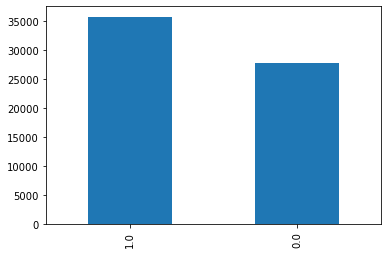

In [15]:
fig, ax = plt.subplots()
s['score'].value_counts().plot(ax=ax, kind='bar')

In [16]:
y = pd.DataFrame(s['score'])
y.head()

,score
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


In [17]:
y_l = pd.get_dummies(y['score'], prefix='D')
print(y_l.head())

   D_0.0  D_1.0
0      0      1
1      0      1
2      1      0
3      1      0
4      1      0
